In [ ]:
import json
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# If using colab

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Connect to google drive

target_folder = "207 Machine Learning: Final Project"
found_path = None

for root, dirs, files in os.walk("/content/drive/MyDrive"):
    if target_folder in dirs:
        found_path = os.path.join(root, target_folder)
        break

if found_path:
    os.chdir(found_path)
    print("Changed working directory to:", os.getcwd())
else:
    print(f"Folder '{target_folder}' not found.")

Changed working directory to: /content/drive/.shortcut-targets-by-id/1MnqFmQYij3NcmwhbYUVc-9h4Dp6eLuMH/207 Machine Learning: Final Project


## <span style="color:chocolate">1. Data Preprocessing</span>

### 1.1 Rename Columns



In [ ]:
# Read in the data
# data_dir = "./Data"
data_dir = "./Data"

centroids_data = pd.read_csv(os.path.join(data_dir, "regional_combined_centroids.csv"))

RANDOM_CODE = 1234

# Rename the columns
with open(os.path.join(data_dir, "rename.json"), 'r') as f:
    rename = json.load(f)

rename_dict = {}
for col in centroids_data.columns:
    if col in rename.keys():
         rename_dict[col] = rename[col]['simplifiedName']

centroids_data.rename(columns=rename_dict, inplace=True)

In [ ]:
centroids_data

,TractID,StateName,CountyName,IsUrban,Pop2010,OccupiedHousingUnits,HighGroupQuarters,GroupQuartersPopulation,GroupQuartersShare,LILA_Urban1_Rural10,...,NHPIPopulation,AIANPopulation,MultiracialPopulation,HispanicPopulation,NoVehicleHouseholds,SNAPRecipients,GEOID,latitude,longitude,state
0,13001950100,Georgia,Appling County,0,3190,1270,0,34,1.07,0,...,0,5,86,104,68,164,13001950100,31.878017,-82.270221,GA
1,13001950400,Georgia,Appling County,0,1476,606,0,0,0.00,1,...,0,10,46,38,38,96,13001950400,31.665217,-82.190726,GA
2,13001950500,Georgia,Appling County,0,3864,1493,0,0,0.00,0,...,11,36,284,394,49,246,13001950500,31.694233,-82.380489,GA
3,13003960100,Georgia,Atkinson County,0,2077,770,0,0,0.00,1,...,3,18,309,387,67,200,13003960100,31.324885,-83.024239,GA
4,13003960200,Georgia,Atkinson County,0,5053,1763,0,20,0.40,0,...,21,16,1121,1437,124,290,13003960200,31.285147,-82.879234,GA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7116,28163950100,Mississippi,Yazoo County,0,7841,1569,0,3548,45.25,1,...,4,55,442,1143,79,273,28163950100,32.880440,-90.218565,Mississippi
7117,28163950200,Mississippi,Yazoo County,1,3208,1206,0,0,0.00,0,...,0,3,27,25,104,388,28163950200,32.866890,-90.384130,Mississippi
7118,28163950300,Mississippi,Yazoo County,1,4612,1601,0,237,5.14,1,...,0,9,22,26,348,867,28163950300,32.872367,-90.408698,Mississippi
7119,28163950400,Mississippi,Yazoo County,0,1833,717,0,0,0.00,0,...,0,0,11,22,20,109,28163950400,32.733620,-90.579636,Mississippi


### 1.2 Drop Columns

In [ ]:
centroids_data_columns = centroids_data.columns.tolist()

# Define a function to classify tracts as food deserts
def is_food_desert(row):
    return 1 if (row["LILA_Urban1_Rural10"] == 1) else 0

# Create a new column in the DataFrame to indicate food deserts
centroids_data["IsFoodDesert"] = centroids_data.apply(is_food_desert, axis=1)

# Drop columns that are not needed, remove columns similar to definition of "Ys" labels
#Drop TractID, StateName, CountyName

features = [
 #'TractID',
 #'StateName',
 #'CountyName',
 'IsUrban',
 'Pop2010',
 'OccupiedHousingUnits',
 'HighGroupQuarters',
 'GroupQuartersPopulation',
 'GroupQuartersShare',


 'LowVehicleAccess',
 'IsLowIncome',
 'PovertyRate',
 #'MedianIncome', # overlap with poverty rate
 #'LA_Urban1_Rural10',
 'LowIncomePopulation',
 'ChildPopulation',
 'SeniorPopulation',
 'WhitePopulation',
 'BlackPopulation',
 'AsianPopulation',
 'NHPIPopulation',
 'AIANPopulation',
 'MultiracialPopulation',
 'HispanicPopulation',
 'NoVehicleHouseholds',
 'SNAPRecipients',
 #'latitude',
 #'longitude',
 #'state',
 #'StateName_Alabama',
 #'StateName_Arkansas',
 #'StateName_Georgia',
 #'StateName_Kentucky',
 #'StateName_Louisiana',
 #'StateName_Mississippi',
 #'StateName_South Carolina',
 #'StateName_Tennessee',
 'IsFoodDesert']

In [ ]:
centroids_data[features].isnull().sum()

,0
IsUrban,0
Pop2010,0
OccupiedHousingUnits,0
HighGroupQuarters,0
GroupQuartersPopulation,0
GroupQuartersShare,0
LowVehicleAccess,0
IsLowIncome,0
PovertyRate,0
LowIncomePopulation,0


In [ ]:
# disply data types of features
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(centroids_data[features].dtypes)

IsUrban                      int64
Pop2010                      int64
OccupiedHousingUnits         int64
HighGroupQuarters            int64
GroupQuartersPopulation      int64
GroupQuartersShare         float64
LowVehicleAccess             int64
IsLowIncome                  int64
PovertyRate                float64
LowIncomePopulation          int64
ChildPopulation              int64
SeniorPopulation             int64
WhitePopulation              int64
BlackPopulation              int64
AsianPopulation              int64
NHPIPopulation               int64
AIANPopulation               int64
MultiracialPopulation        int64
HispanicPopulation           int64
NoVehicleHouseholds          int64
SNAPRecipients               int64
IsFoodDesert                 int64
dtype: object


### 1.3 Split Data

In [ ]:
# Shuffle the data
shuffled_indices = np.random.RandomState(RANDOM_CODE).permutation(len(centroids_data[features]))
centroids_data = centroids_data.iloc[shuffled_indices].reset_index(drop=True)

# Split the data
y = centroids_data["IsFoodDesert"]
X = centroids_data[features].drop(columns=["IsFoodDesert"])

# X_train, X_temp, y_train, y_temp  = train_test_split(X, y, test_size=0.2, random_state=1)
# X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5,random_state=1)

X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2, random_state=1)


In [ ]:
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (5696, 21)
Test set shape: (1425, 21)


### 1.4 Random Forest Model

In [47]:
model = RandomForestClassifier(
    random_state=RANDOM_CODE,
    n_estimators=10,
    criterion='entropy',
    n_jobs=2,
    max_features=None,
    bootstrap=False,
    max_depth=8,
)

forest = model.fit(X_train,y_train)

train_forest = forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)

print ('Accuracy on training data:', round(train_forest.score(X_train, y_train),2))
# print ('Accuracy on validation data:', round(train_forest.score(X_val, y_val),2))
print('Accuracy on testing data:', round(accuracy_score(y_test, y_pred),2))
# Confusion Matrix
#print("\n🧮 Confusion Matrix:")
#print(confusion_matrix(y_test, y_pred))

# Precision, Recall, F1
print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred))

#print features
features_update = centroids_data[features].drop(columns=["IsFoodDesert"]).columns.tolist()
#print('Features:',features_update)
#print ('Feature importances:', forest.feature_importances_)

arr = np.array(forest.feature_importances_)
features_array = np.array(features_update)
top3_indices = np.argsort(forest.feature_importances_)[-3:][::-1]
print("Top 3 largest feature importance score:", np.round(arr[top3_indices], 2))
print("Top 3 important features:", features_array[top3_indices] )



Accuracy on training data: 0.89
Accuracy on testing data: 0.82

🧮 Confusion Matrix:
[[961 117]
 [138 209]]

📊 Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.89      0.88      1078
           1       0.64      0.60      0.62       347

    accuracy                           0.82      1425
   macro avg       0.76      0.75      0.75      1425
weighted avg       0.82      0.82      0.82      1425

Top 3 largest feature importance score: [0.55 0.09 0.08]
Top 3 important features: ['IsLowIncome' 'IsUrban' 'NoVehicleHouseholds']


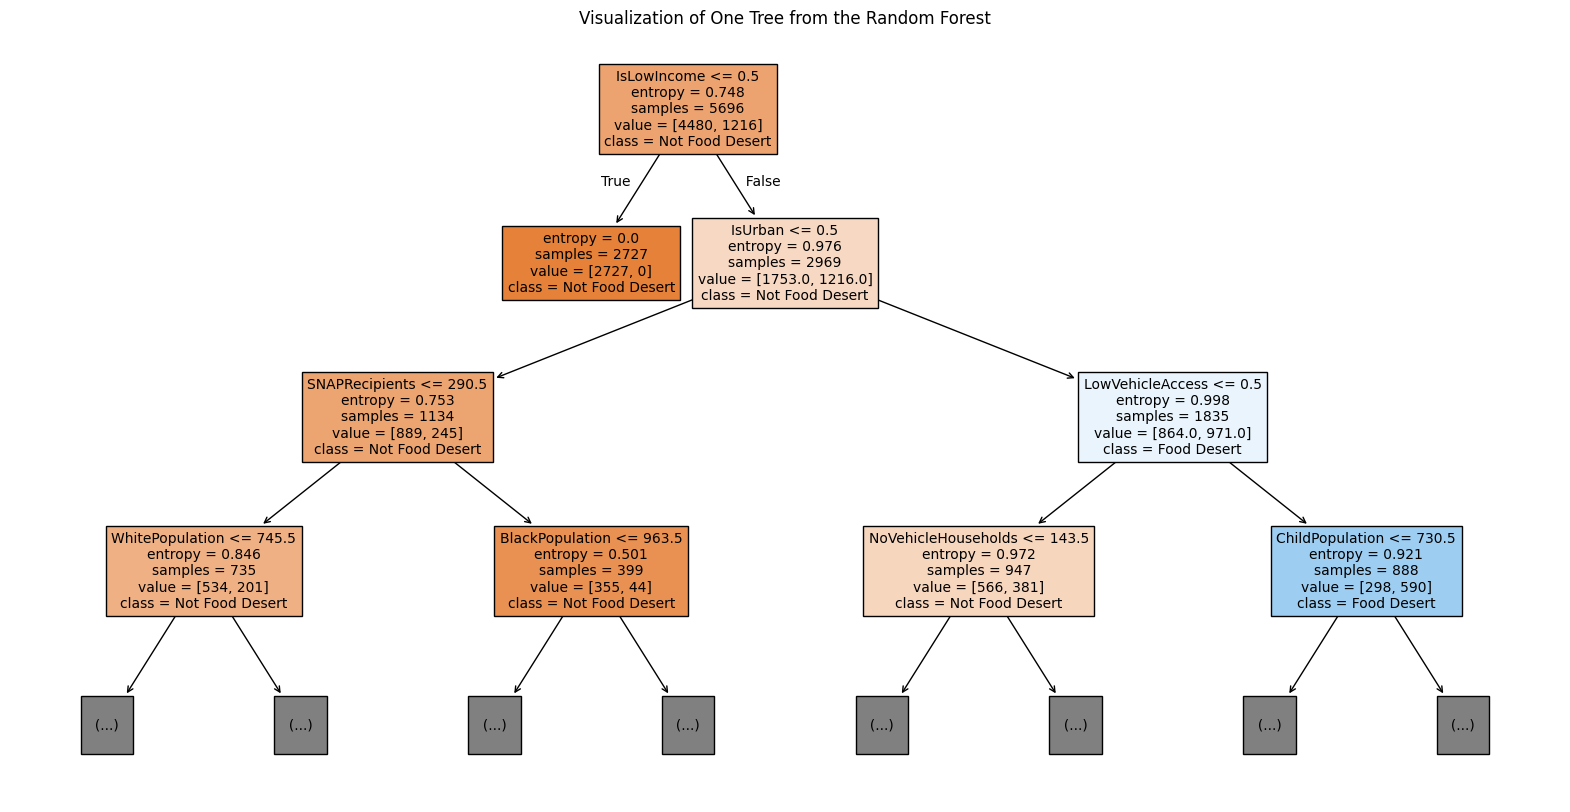

In [ ]:
# Pick one tree from the forest
estimator = model.estimators_[0]

plt.figure(figsize=(20, 10))
plot_tree(estimator,
          feature_names=features,
          class_names=['Not Food Desert', 'Food Desert'],
          filled=True,
          max_depth=3,     # Limit depth for readability
          fontsize=10)
plt.title("Visualization of One Tree from the Random Forest")

plt.show()